# Exercises in Clustering

## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('Ch5_bike_station_locations.csv')
display(df.head())
print(f"rows and coloumns: {df.shape}")

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


rows and coloumns: (244, 2)


<p>Just by looking at the data, I can see it is unlabeled, so it's unsupervised. Clustering applied to unlabeled data is all about finding an underlying natural structure. Basically, which group each data point belongs to, and how many groups there are. K-Means is one way to do this. The elbow method involves trying different amounts of K (the total number of clusters). For each K, the SSE will go down, but it will eventually flatten at a point where we’re not learning much more about the data. At that stage, we’re just splitting hairs instead of discovering meaningful natural groups.</p>


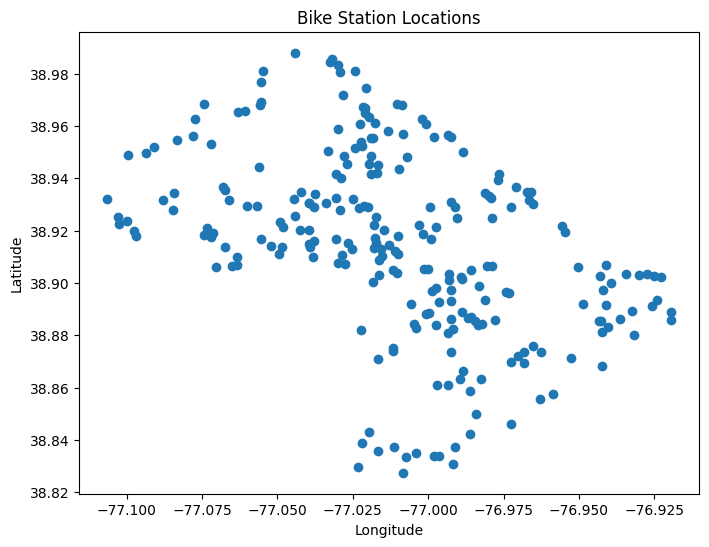

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'])
plt.title('Bike Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<p>The scatterplot reveals some points (bikestations) are gathered closer together in some areas, while less desity in others. The data is very suitable for clustering analysis.</p>

<hr>

<h3>Task 1 Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.</h3>

In [24]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

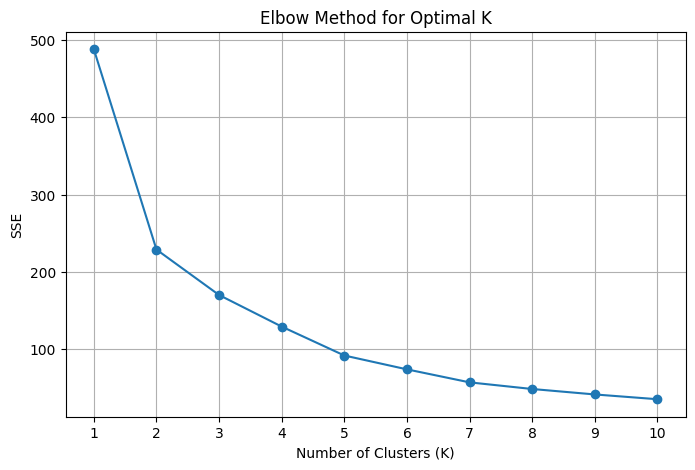

In [ ]:
# Try different K and store SSE
sse = []
K_values = range(1, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_) # inertia_ is the SSE. It's the distance between the data points and their assigned cluster centers, squared.

plt.figure(figsize=(8, 5))
plt.plot(K_values, sse, marker='o')
plt.title('Elbow Method for Optimal K (10 K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.xticks(K_values)
plt.grid(True)
plt.show()

<p>As expected it the SSE climbs down great the first K and flattens more clusters we add. Biggest drop from K=1 to K2. Makes sense since 1 cluster is the worst possible case. Second best improvement K=2 to K5. Third best is from K=5 to K=7. Still some gains, but not as much. There is only tiny improvement. </p>

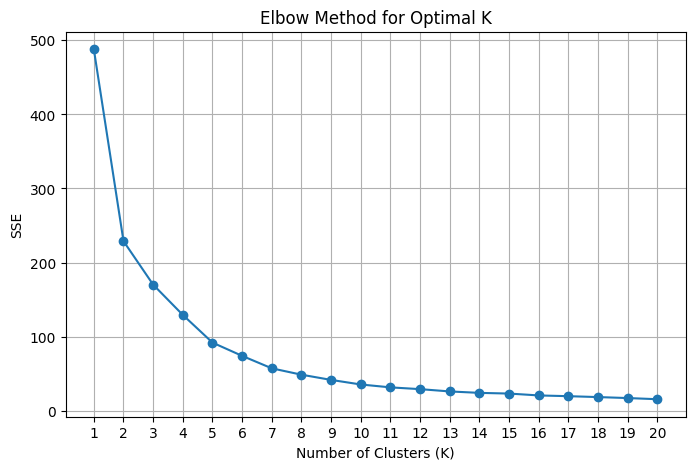

In [ ]:
# Try different K and store SSE
sse = []
K_values = range(1, 21)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_) # inertia_ is the SSE. It's the distance between the data points and their assigned cluster centers, squared.

plt.figure(figsize=(8, 5))
plt.plot(K_values, sse, marker='o')
plt.title('Elbow Method for Optimal K (20 K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.xticks(K_values)
plt.grid(True)
plt.show()

<p>It's not perfectly clear where to make the best cut, but I think the elbow appears between K=5 and K=7. After that the SSE decrease starts to slow down significantly.   </p>

<hr>
<h3>Task 2 Visualize the K-Means clustering result for the best K.</h3>

In [35]:
df['KMeansCluster'] = KMeans(n_clusters=6, random_state=2, n_init=10).fit(scaled_data).labels_
df.head() # Confirming the results are added to df

,latitude,longitude,KMeansCluster
0,38.956590,-76.993437,0
1,38.905218,-77.001496,5
2,38.980858,-77.054722,0
3,38.902925,-76.929915,2
4,38.949498,-77.093620,3


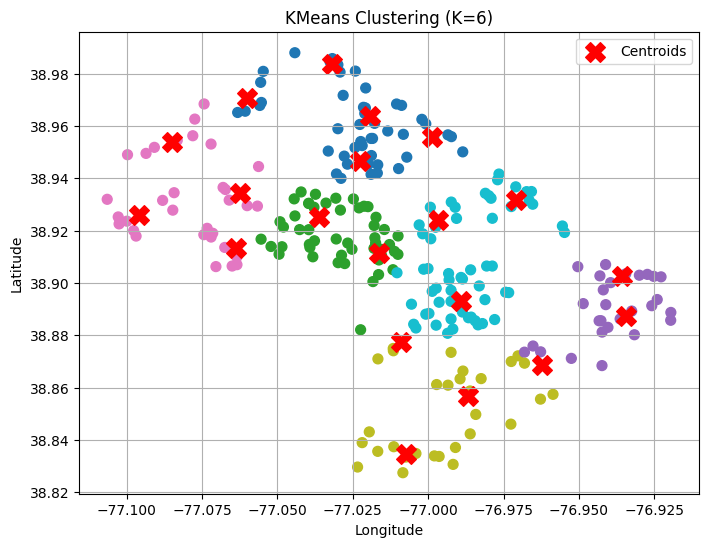

In [40]:
centroids_deg = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_lat = centroids_deg[:, 0]
centroids_lon = centroids_deg[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['KMeansCluster'], cmap='tab10', s=50)
plt.scatter(centroids_lon, centroids_lat, color='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (K=6)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

<hr>
<h3>Task 3 Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.</h3>

<hr>
<h3>Task 4 Generate this number of clusters with Agglomerative clustering and visualize the clustering.</h3>

<hr>
<h3>Task 5 Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)</h3>

<hr>
<h3>Task 6 Visual the final DBSCAN clustering you decided upon in 5.</h3>

<hr>
<h3>Task 7 Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.</h3>